## 파이썬 머신러닝
# 교차 검증, 그리드 서치, 오차 행렬

### 교차 검증 (Cross Validation)
- 이제 까지 머신러닝을 적용한 결과를 검증하기 위해서, train_test_split() 함수를 사용하여 훈련세트와 테스트 세트를 분리하였다.
- train_test_split() 함수는 랜덤하게 샘플을 선정하므로 실행할 때마다 다른 결과를 얻었었다.
- 교차 검증 기술은 원본 데이터를 **k 개의 구간(폴드)** 로 나눈 다음, 차례 대로 한개의 구간을 테스트 세트로 놓고 k 번의 결과를 도출하는 것이다.
- 교과서 307쪽 그림 참조
- 교차 검증을 사용하면 러신러닝 모델이 훈련 데이터에 얼마나 민감한지를 알 수 있고, 모든 데이터를 효율적으로 사용할 수 있다. 하지만 작업을 k 번 만큼 하므로 작업시간이 길어진다.
- 두 가지 중요한 옵션
    1. 구간을 나누기 전에 데이터를 섞을 것인가 (shuffle)
    2. 데이터를 나눌 때 목표값 비율 대로 샘플을 넣어 줄 것인가 (stratified)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

model = DecisionTreeClassifier(max_features=2)
# train_test_split(), fit()
scores = cross_val_score(model, iris.data, iris.target, cv=3) # cv=3 default

display(scores, scores.mean())

array([0.98039216, 0.92156863, 1.        ])

0.9673202614379085

- cross_val_score() 함수는 shuffle 을 적용하지 않고, 분류의 경우 원본 비율을 유지(stratified) 한다.
- 이러한 정책을 바꾸려면 cv 옵션에 별도의 클래스를 정의해 주어야 한다. (KFold, StratifiedKFold)

In [7]:
from sklearn.model_selection import KFold

kfold = KFold(3) # shuffle=False
scores1 = cross_val_score(LogisticRegression(), iris.data, iris.target, cv=kfold)

scores1

array([0., 0., 0.])

In [8]:
from sklearn.model_selection import KFold

kfold = KFold(3, shuffle=True) # shuffle=True
scores1 = cross_val_score(LogisticRegression(), iris.data, iris.target, cv=kfold)

scores1

array([0.98, 0.9 , 0.96])

In [8]:
from sklearn.model_selection import StratifiedKFold

fold = StratifiedKFold(3) # shuffle=False (default)
scores2 = cross_val_score(LogisticRegression(), iris.data, iris.target, cv=fold)

scores2

array([0.96078431, 0.92156863, 0.95833333])

In [9]:
from sklearn.model_selection import StratifiedKFold

fold = StratifiedKFold(3, shuffle=True)
scores2 = cross_val_score(LogisticRegression(), iris.data, iris.target, cv=fold)

scores2

array([0.98039216, 0.92156863, 0.97916667])

### LOOCV (Leave One Out Cross Validation)
- 샘플 하나만 테스트 세트로 잡는 방법이다. 원본 데이터 갯수만큼 모델을 적용하므로 연산 비용이 아주 높다.

In [12]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
scores = cross_val_score(LogisticRegression(), iris.data, iris.target, cv=loo)

display(scores, scores.mean())

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

0.9533333333333334

### 그리드 서치 (Grid Search)
- 최적의 인자를 찾는 방법

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

params = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(SVC(), params, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [17]:
grid.score(X_test, y_test)

1.0

In [18]:
grid.best_params_

{'C': 100, 'gamma': 0.01}

In [19]:
grid.best_score_ # 훈련세트에 대한 교차검증 점수 평균

0.9732142857142857

In [20]:
grid.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
result = grid.cv_results_['mean_test_score'].reshape(6,6)
result

array([[0.35714286, 0.35714286, 0.35714286, 0.35714286, 0.35714286,
        0.35714286],
       [0.35714286, 0.35714286, 0.35714286, 0.35714286, 0.35714286,
        0.35714286],
       [0.35714286, 0.66071429, 0.9375    , 0.96428571, 0.35714286,
        0.35714286],
       [0.66071429, 0.94642857, 0.96428571, 0.96428571, 0.91071429,
        0.51785714],
       [0.94642857, 0.96428571, 0.96428571, 0.94642857, 0.91071429,
        0.53571429],
       [0.96428571, 0.97321429, 0.9375    , 0.91964286, 0.91071429,
        0.53571429]])

([<matplotlib.axis.YTick at 0x26e8b86cba8>,
 <a list of 6 Text yticklabel objects>)

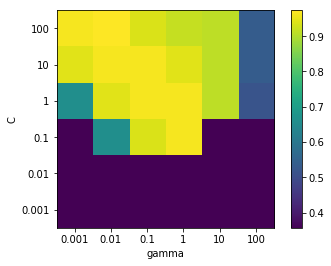

In [22]:
plt.imshow(result, interpolation='none', origin='lower')
plt.colorbar()
plt.xlabel('gamma')
plt.ylabel('C')
plt.xticks(range(6), [0.001, 0.01, 0.1, 1, 10, 100])
plt.yticks(range(6), [0.001, 0.01, 0.1, 1, 10, 100])

### 오차 행렬 (Confusion Matrix)
- 목표값인 y 와, 예측 결과인 pred_y 값을 비교하여 결과를 평가하는 방법

In [28]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
pred_y = model.predict(X_test)

display(y_test, pred_y)

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1])

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0])

In [30]:
np.bincount(y_test)

array([54, 89], dtype=int64)

In [31]:
np.bincount(pred_y) # 양성으로 예측한 것은 90개

array([52, 91], dtype=int64)

In [32]:
np.where((pred_y==1) & (y_test==0)) # &(and),|(or) => FP (False Positive)

(array([11, 17, 56, 73, 95], dtype=int64),)

In [33]:
5 / 91 # 괜찮다고 진단 했는데 실제로는 심한 사람

0.054945054945054944

In [34]:
5 / 54 # 실제 심한 사람인데 괜찮다고 진단한 경우

0.09259259259259259

In [35]:
np.where(pred_y==1)[0]

array([  0,   1,   2,   4,   7,   8,  10,  11,  14,  15,  17,  20,  22,
        23,  25,  27,  29,  30,  33,  34,  35,  37,  38,  40,  41,  42,
        44,  45,  48,  49,  50,  51,  52,  54,  56,  57,  59,  60,  61,
        65,  66,  67,  68,  70,  71,  73,  74,  77,  78,  79,  81,  82,
        84,  85,  86,  92,  93,  95,  96,  97,  98,  99, 100, 102, 103,
       104, 105, 106, 109, 110, 112, 113, 114, 116, 117, 118, 121, 122,
       124, 125, 127, 128, 129, 130, 131, 132, 134, 135, 137, 138, 141],
      dtype=int64)

In [36]:
y_test[np.where(pred_y==1)[0]]

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

In [37]:
score = (y_test == pred_y).sum() / len(y_test)
score

0.9440559440559441

- confusion_matrix

In [38]:
from sklearn.metrics import confusion_matrix

cmat = confusion_matrix(y_test, pred_y)
cmat
# TN FP
# FN TP

array([[49,  5],
       [ 3, 86]], dtype=int64)

In [39]:
(y_test==0).sum()

54

- 위의 결과에서 행은 실제 목표값(y_test), 열은 예측값(pred_y)을 나타낸다.
- 행렬의 각 값들을 TN, FP, FN, TP 라고 부른다.
    1. TP : True Positive, 양성으로 예측했는데 맞은 경우
    2. FP : False Positive, 양성으로 예측했으나 틀린 경우 (실제로는 음성)
    3. TN : True Negative, 음성으로 예측했는데 맞은 경우
    4. FN : False Negative, 음성으로 예측했으나 틀린 경우 (실제로는 양성)
    
| &nbsp; | 예측-0 | 예측-1 |
|--------|--------|--------|
| 실제-0 | TN     | FP     |
| 실제-1 | FN     | TP     |

- 교재 340 쪽 참조
- 위의 결과에서 FP 인 경우는 문제가 생깁니다. 양성이라고 믿게 되지만 실제로는 악성이기 때문입니다. 결국 유방암 데이터의 경우, 스코어는 떨어지더라도 FP 를 낮추는 모델이 필요합니다.
- 반대로 FN 인 경우는 문제가 크지 않습니다. 일단 악성으로 진단받아 충격은 크겠지만 정밀 검사를 통해 양성임이 판별될 것이기 때문입니다.

In [40]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

model = LogisticRegression()
model.fit(X_train, y_train)

pred_y = model.predict(X_test)

cmat = confusion_matrix(y_test, pred_y)
cmat

array([[12,  0,  0],
       [ 0, 10,  4],
       [ 0,  0, 12]], dtype=int64)

- 숫자 데이터 적용

In [41]:
from sklearn.datasets import load_digits

mnist = load_digits()

In [42]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target)
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9666666666666667

In [43]:
pred_y = model.predict(X_test)

result = np.zeros([10,10])
for i in range(len(y_test)):
    result[y_test[i],pred_y[i]] +=1
    
result

array([[43.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0., 33.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  1., 52.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 36.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0., 39.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., 43.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 48.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., 50.,  0.,  0.],
       [ 0.,  2.,  0.,  2.,  0.,  0.,  0.,  0., 49.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  1., 42.]])

In [44]:
cmat = confusion_matrix(y_test, pred_y)
cmat

array([[43,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0, 33,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  1, 52,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 36,  0,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  0, 39,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 43,  2,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 48,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 50,  0,  0],
       [ 0,  2,  0,  2,  0,  0,  0,  0, 49,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  1,  1, 42]], dtype=int64)

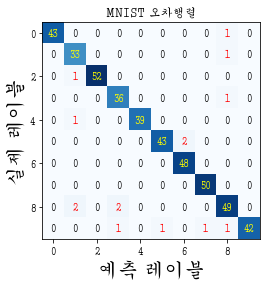

In [45]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/uni_hsr.ttf").get_name()
rc('font', family=font_name)

plt.imshow(cmat, cmap='Blues')

plt.title('MNIST 오차행렬')
plt.xlabel('예측 레이블', fontsize=20)
plt.ylabel('실제 레이블', fontsize=20)

for (i,j),v in np.ndenumerate(cmat):
    if v==0: plt.text(j,i,v,ha='center',va='center')
    elif v<30: plt.text(j,i,v,ha='center',va='center', color='red')
    else: plt.text(j,i,v,ha='center',va='center',color='yellow')